<h1> Game of Thrones - Classification Model Development </h1>
<h4>DAT-5303 | Machine Learning</h4>
Arjun Manohar<br>
MBAN - 2<br>
Hult International Business School<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './GOT_character_predictions.xlsx'


# reading the file into Python
got_data = pd.read_excel(io = file)


# outputting the first 5 rows of the dataset
got_data.head(n = 5)

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.016722,1
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.050167,1
2,3,Azor Ahai,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,Nissa Nissa,0,1,1,1,1,NaN,NaN,NaN,1.0,NaN,0.117057,1
3,4,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0.745819,1
4,5,Kraznys mo Nakloz,NaN,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,64.0,0.076923,0


In [2]:
# checking the dtypes of the variables
got_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1836 non-null   int64  
 1   name                        1836 non-null   object 
 2   title                       880 non-null    object 
 3   male                        1836 non-null   int64  
 4   culture                     627 non-null    object 
 5   dateOfBirth                 391 non-null    float64
 6   mother                      21 non-null     object 
 7   father                      26 non-null     object 
 8   heir                        23 non-null     object 
 9   house                       1422 non-null   object 
 10  spouse                      256 non-null    object 
 11  book1_A_Game_Of_Thrones     1836 non-null   int64  
 12  book2_A_Clash_Of_Kings      1836 non-null   int64  
 13  book3_A_Storm_Of_Swords     1836 

<h2> Basic Imputations </h2>
<br>
<br>

In [3]:
# checking the missing values
nan = got_data.isna().sum() 
nan[nan > 0]


title             956
culture          1209
dateOfBirth      1445
mother           1815
father           1810
heir             1813
house             414
spouse           1580
isAliveFather    1815
isAliveMother    1810
isAliveSpouse    1813
isAliveHeir      1580
age              1426
dtype: int64

In [4]:
got_data.describe(include = 'number').round(decimals=2)
# note: negative mean spotted under age

,S.No,male,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
count,1836.00,1836.00,391.00,1836.00,1836.00,1836.00,1836.00,1836.00,21.00,26.00,23.00,256.00,410.00,1836.00,1836.00
mean,918.50,0.61,1717.91,0.19,0.58,0.47,0.37,0.38,0.71,0.19,0.65,0.77,-1368.04,0.08,0.73
std,530.15,0.49,20587.05,0.39,0.49,0.50,0.48,0.48,0.46,0.40,0.49,0.42,20104.31,0.15,0.44
min,1.00,0.00,-28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00
25%,459.75,0.00,237.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,0.01,0.00
50%,918.50,1.00,267.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,27.00,0.03,1.00
75%,1377.25,1.00,285.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,49.75,0.08,1.00
max,1836.00,1.00,298299.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,1.00,1.00


In [5]:
# checking negatives values under age
got_data.loc[:, ['age', 'name']][got_data['age'] < 0] 

,age,name
443,-298001.0,Addam Velaryon
1023,-277980.0,Polliver


In [6]:
# note: age has both NaNs and negative values

# imputing filling -ve age with 0 
got_data['age'] = np.where((got_data['age'] < 0 ), 0,got_data.age)

# checking imputation
got_data.loc[:, ['age', 'name']][got_data['age'] < 0] 

,age,name


In [7]:
# filling other missing numerical columns with -1 or empty string
fill = -1
nan_cols = ['isAliveFather','isAliveMother','isAliveSpouse','isAliveHeir']

for val in nan_cols:
    got_data[val].fillna(fill, inplace=True)

# checking
got_data.isna().sum()

# filling categorical values with other
got_data['culture'].fillna(value="unknown_culture", inplace=True)
got_data['house'].fillna(value="unknown_house", inplace=True)
got_data['title'].fillna(value="unknown_title", inplace=True)

# checking
got_data['title'].isna().any()

False

<h1> Feature Enginnering </h1>
<br>
<br>

In [8]:
# feature engineering. - checking the culture column
got_data['culture'].value_counts() # some cultures can be grouped

unknown_culture            1209
Northmen                    118
Ironborn                    105
Free Folk                    50
Valyrian                     43
Braavosi                     41
Dornish                      21
Dothraki                     21
Ghiscari                     21
Rivermen                     16
Valemen                      16
Reach                        15
Vale mountain clans          14
Westeros                     12
Dornishmen                   11
Free folk                    10
Westerman                     9
northmen                      9
Tyroshi                       7
Stormlands                    6
Northern mountain clans       5
Qartheen                      5
Astapori                      4
Summer Isles                  4
Westermen                     4
Ironmen                       4
Meereenese                    3
First Men                     3
Lysene                        3
Pentoshi                      3
Crannogmen                    3
Wildling

In [9]:
# Lots of different names for the same culture - grouping recommended
culture_grouping = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Astapor' : ['astapor', 'astapori'],
    'Lysene': ['lysene', 'lyseni'],
    'Lhazaren' : ['lhazareen', 'lhazarene'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Mereen': ['meereen', 'meereenese'],
    'RiverLands': ['riverlands', 'rivermen'],
    'Vale': ['vale', 'valemen', 'vale mountain clans'],
    'Valyrian' : ['valyrian'],
}

# creating a UDF for grouping
def get_culture_grouping(value):
    value = value.lower()
    v = [k for (k, v) in culture_grouping.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

# calling the function on the newly created column - created for data integrity
got_data.loc[:, "culture_grouped"] = [get_culture_grouping(x) for x in got_data["culture"]]

# checking the groupings
got_data['culture_grouped'].value_counts()

Unknown_Culture            1209
Northmen                    127
Ironborn                    110
Free Folk                    66
Valyrian                     43
Braavosi                     42
Dornish                      34
Vale                         31
Ghiscari                     22
Dothraki                     21
RiverLands                   18
Westermen                    17
Reach                        15
Westerosi                    12
Stormlander                   7
Tyroshi                       7
Qartheen                      6
Summer Islands                6
Northern Mountain Clans       5
Astapor                       5
Mereen                        4
Lysene                        4
Pentoshi                      3
Lhazaren                      3
Crannogmen                    3
Wildlings                     2
Qohor                         2
Norvoshi                      2
Andal                         2
Sistermen                     2
Asshai                        2
Myrish  

<h3> Note: </h3>
<br>
In order to impute the missing values of the culture, we must know which house they belong too. Since the house column also has missing values, a new reference variable is required to classify the cultures correctly. Therefore, a 'Region' column was created. This column is built using a key string that takes house names of all major houses in Westeros and divides them into 9 regions, based on where their parent house is located. 

- Using these 9 key reference strings (each depicting the 9 main regions), every name in the dataset was checked against the reference strings to build the Region column.

- After which Region was then used to find the missing Houses 

- Finally, using the corrected Houses and 9 regional reference keys, missing values under culture was imputed




In [10]:
# creating regions reference column

# new column
got_data['regions'] = 0

# regional reference key #1
north = ['liddle','flint','mormont','stout','woods','black', 'burley', 'knott', 'harclay', 'wull', 'norrey', 'umber', 'karstark', 'bolton', 'stark', 'glover', 'tallhart', 'ryswell', 'cerwyn', 'hornwood', 'woolfield','manderly','dustin','locke','reed']

# creating the regions based on name
for name in north:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower():
            got_data.loc[index, 'regions'] = 'North'

# regional reference key #2           
riverlands = ['frey','paege','haigh','strong','mallister','vypren', 'goodbrook','butterwell','blackwood', 'bracken', 'roote', 'hawick', 'darry', 'lychester', 'vance', 'tully', 'harlton', 'piper', 'wode', 'harenhal', 'mooton', 'whent', 'smallwood']

for name in riverlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower():
            got_data.loc[index, 'regions'] = 'Riverlands'

# regional reference key #3    
arryn = ['crows','hardyng','tollett','arryn', 'belmore', 'corbray', 'coldwater', 'lynderly', 'hunter', 'baelish', 'malcom', 'templeton', 'waywood', 'sunderland', 'elashem', 'royce', 'grafton', 'redfort', 'waxley']


for name in arryn:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower():
            got_data.loc[index, 'regions'] = 'Vale of Arryn'

# regional reference key #4
westerlands = ['marbrand','clifton','spicer','lydden','blanetree','plumm','estren', 'banerfort', 'westerling','farman','sarsfield','brax','lefford','marband','lyden','lannister','kenning','prester','clegane','serret','greenfield','sarwyck','swyift','swyft','crakehall']

for name in westerlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower():
            got_data.loc[index, 'regions'] = 'Westerlands'

# regional reference key #5           
iron = ['waynwood','botley','ironmaker','jast','drowned men','codd','farwynd','humble','myre','sharp','shepherd','stonetree','tawney','volmark','weaver','wynch','greyjoy', 'harlaw', 'orkwood', 'blacktyde', 'stonehouse', 'drumm', 'sparr', 'merlyn', 'brother', 'saltcliffe']


for name in iron:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower():
            got_data.loc[index, 'regions'] = 'Iron Islands'

# regional reference key #6
reach = ['hightower','norcross','footly', 'roxton', 'kidwell','bulwer','ball','uffering','beesbury', 'cordwayner', 'rowan', 'osgrey', 'crane', 'oakheart', 'webber', 'hewett','grimm','serry','chester','tyrell','florent','blackbar','tarly','peak','fossoway','merryweather','ashford','redwyne','vryrnel','graceford','appleton','caswell','shermer','meadows']

for name in reach:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower():
            got_data.loc[index, 'regions'] = 'Reach'

# regional reference key #7
stormlands = ['grandson', 'fell', 'buckler','reach', 'errol', 'penrose', 'steadmon', 'trant', 'tarth', 'baratheon', 'connington','cafferen','selmy','dondarrion','swann','moriggen','seaworth','rogers','mertyns','whitehead','caron','wylde','estermont']

for name in stormlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower():
            got_data.loc[index, 'regions'] = 'Stormlands'

# regional reference key #8
dorne = ['wells','drinkwater','brave companions','martell', 'toland', 'dalt', 'gargalen', 'vaith', 'jordayne', 'allyrion', 'uller', 'santagar', 'yronwood', 'fowler', 'qorgyle', 'dayne', 'blackmont', 'manwoody', 'Wyl']


for name in dorne:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower():
            got_data.loc[index, 'regions'] = 'Dorne'

# regional reference key #9
kings=['ambrose','celtigar','kingsguard','crabb','hollard','farring','byrch','brune','rosby','city watch' 'staunton', 'rykker', 'darklyn', 'buckwell', 'stokeworth', 'hayford', 'wendwater', 'massey', 'bar emmon', 'velaryon', 'targaryen']

for name in kings:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower():
            got_data.loc[index, 'regions'] = 'Kings Landing'

# checking the reference columns
got_data['regions'].value_counts()

0                943
Riverlands       181
Reach            143
North            121
Kings Landing    104
Westerlands       94
Iron Islands      91
Stormlands        62
Dorne             50
Vale of Arryn     47
Name: regions, dtype: int64

In [11]:
# imputing the missing houses under 'corrected_house'

# creating the new column
got_data['corrected_house']= got_data['house']
count = 0 # counter

# note:
# the code will loop through all the names where houses that are unknown
# then the house + 'name' will be imputed
# name is iterated for every family name classified under the 9 key reference strings

# checking names belonging to the Northern region
for name in north:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() and got_data.loc[index, 'house'] == 'unknown_house' :
            got_data.loc[index, 'corrected_house'] = 'House '+ name.title()
#             print(got_data.loc[index, 'corrected_house'])
            count += 1

# checking names belonging to the Riverlands region
for name in riverlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() and got_data.loc[index, 'house'] == 'unknown_house' :
            got_data.loc[index, 'corrected_house'] = 'House '+ name.title()
#             print(got_data.loc[index, 'corrected_house'])

# checking names belonging to the Arryn region
for name in arryn:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() and got_data.loc[index, 'house'] == 'unknown_house' :
            got_data.loc[index, 'corrected_house'] = 'House '+ name.title()
#             print(got_data.loc[index, 'corrected_house'])

# checking names belonging to the Westerlands region
for name in westerlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() and got_data.loc[index, 'house'] == 'unknown_house' :
            got_data.loc[index, 'corrected_house'] = 'House '+ name.title()
#             print(got_data.loc[index, 'corrected_house'])

# checking names belonging to the Iron Islands region
for name in iron:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() and got_data.loc[index, 'house'] == 'unknown_house' :
            got_data.loc[index, 'corrected_house'] = 'House '+ name.title()
#             print(got_data.loc[index, 'corrected_house'])

# checking names belonging to the Reach region
for name in reach:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() and got_data.loc[index, 'house'] == 'unknown_house' :
            got_data.loc[index, 'corrected_house'] = 'House '+ name.title()
#             print(got_data.loc[index, 'corrected_house'])

# checking names belonging to the Stormlands region
for name in stormlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() and got_data.loc[index, 'house'] == 'unknown_house' :
            got_data.loc[index, 'corrected_house'] = 'House '+ name.title()
#             print(got_data.loc[index, 'corrected_house'])

# checking names belonging to the Dornish region
for name in dorne:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() and got_data.loc[index, 'house'] == 'unknown_house' :
            got_data.loc[index, 'corrected_house'] = 'House '+ name.title()
#             print(got_data.loc[index, 'corrected_house'])

# checking names belonging to the King's Landing region
for name in kings:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() and got_data.loc[index, 'house'] == 'unknown_house' :
            got_data.loc[index, 'corrected_house'] = 'House '+ name.title()
#             print(got_data.loc[index, 'corrected_house'])


# checking the imputations
got_data['corrected_house'].value_counts()

unknown_house                              369
Night's Watch                              101
House Frey                                  98
House Stark                                 78
House Targaryen                             75
House Lannister                             47
House Greyjoy                               39
House Tyrell                                35
House Martell                               24
House Osgrey                                21
Faith of the Seven                          16
House Hightower                             16
House Arryn                                 15
House Baratheon                             15
House Bracken                               14
House Florent                               13
House Botley                                13
House Tully                                 12
House Velaryon                              11
House Whent                                 11
House Bolton                                10
House Crakeha

In [12]:
# updating regional groupings and Regions

# regional reference key #1
north = ['liddle','flint','mormont','stout','woods','black', 'burley', 'knott', 'harclay', 'wull', 'norrey', 'umber', 'karstark', 'bolton', 'stark', 'glover', 'tallhart', 'ryswell', 'cerwyn', 'hornwood', 'woolfield','manderly','dustin','locke','reed']

for name in north:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'North'


# regional reference key #2
riverlands = ['frey','paege','haigh','strong','mallister','vypren', 'goodbrook','butterwell','blackwood', 'bracken', 'roote', 'hawick', 'darry', 'lychester', 'vance', 'tully', 'harlton', 'piper', 'wode', 'harenhal', 'mooton', 'whent', 'smallwood']

for name in riverlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'Riverlands'

            
# regional reference key #3
arryn = ['crows','hardyng','tollett','arryn', 'belmore', 'corbray', 'coldwater', 'lynderly', 'hunter', 'baelish', 'malcom', 'templeton', 'waywood', 'sunderland', 'elashem', 'royce', 'grafton', 'redfort', 'waxley']

for name in arryn:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'Vale of Arryn'


# regional reference key #4
westerlands = ['marbrand','clifton','spicer','lydden','blanetree','plumm','estren', 'banerfort', 'westerling','farman','sarsfield','brax','lefford','marband','lyden','lannister','kenning','prester','clegane','serret','greenfield','sarwyck','swyift','swyft','crakehall']

for name in westerlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'Westerlands'
            

# regional reference key #5        
iron = ['waynwood','botley','ironmaker','jast','drowned men','codd','farwynd','humble','myre','sharp','shepherd','stonetree','tawney','volmark','weaver','wynch','greyjoy', 'harlaw', 'orkwood', 'blacktyde', 'stonehouse', 'drumm', 'sparr', 'merlyn', 'brother', 'saltcliffe']

for name in iron:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'Iron Islands'
            

# regional reference key #6            
reach = ['hightower','norcross','footly', 'roxton', 'kidwell','bulwer','ball','uffering','beesbury', 'cordwayner', 'rowan', 'osgrey', 'crane', 'oakheart', 'webber', 'hewett','grimm','serry','chester','tyrell','florent','blackbar','tarly','peak','fossoway','merryweather','ashford','redwyne','vryrnel','graceford','appleton','caswell','shermer','meadows']

for name in reach:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'Reach'


# regional reference key #7            
stormlands = ['grandson', 'fell','buckler','reach', 'errol', 'penrose', 'steadmon', 'trant', 'tarth', 'baratheon', 'connington','cafferen','selmy','dondarrion','swann','moriggen','seaworth','rogers','mertyns','whitehead','caron','wylde','estermont']

for name in stormlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'Stormlands'
            

# regional reference key #8            
dorne = ['wells','drinkwater','brave companions','martell', 'toland', 'dalt', 'gargalen', 'vaith', 'jordayne', 'allyrion', 'uller', 'santagar', 'yronwood', 'fowler', 'qorgyle', 'dayne', 'blackmont', 'manwoody', 'Wyl']

for name in dorne:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'Dorne'

            
# regional reference key #9
kings=['ambrose','celtigar','kingsguard','crabb','hollard','farring','byrch','brune','rosby','city watch','staunton', 'rykker', 'darklyn', 'buckwell', 'stokeworth', 'hayford', 'wendwater', 'massey', 'bar emmon', 'velaryon', 'targaryen']

for name in kings:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'Kings Landing'

# regional reference key #10
for index, col in got_data.iterrows():
        if 'house' not in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'Not Westeros'
            
# regional reference key #11
for index, col in got_data.iterrows():
        if got_data.loc[index, 'regions']==0:
            got_data.loc[index, 'regions'] = 'unknown_region'
            
# checking the updated regional column            
got_data['regions'].value_counts()

unknown_region    492
Riverlands        208
North             180
Reach             166
Not Westeros      155
Iron Islands      139
Kings Landing     136
Westerlands       125
Stormlands         83
Dorne              77
Vale of Arryn      75
Name: regions, dtype: int64

In [13]:
# checking the Culture column for feature engineering
got_data['culture'].value_counts()

unknown_culture            1209
Northmen                    118
Ironborn                    105
Free Folk                    50
Valyrian                     43
Braavosi                     41
Dornish                      21
Dothraki                     21
Ghiscari                     21
Rivermen                     16
Valemen                      16
Reach                        15
Vale mountain clans          14
Westeros                     12
Dornishmen                   11
Free folk                    10
Westerman                     9
northmen                      9
Tyroshi                       7
Stormlands                    6
Northern mountain clans       5
Qartheen                      5
Astapori                      4
Summer Isles                  4
Westermen                     4
Ironmen                       4
Meereenese                    3
First Men                     3
Lysene                        3
Pentoshi                      3
Crannogmen                    3
Wildling

In [14]:
# imputing missing cultures using the logic explained before

# regional reference key #1
north = ['liddle','flint','mormont','stout','woods','black', 'burley', 'knott', 'harclay', 'wull', 'norrey', 'umber', 'karstark', 'bolton', 'stark', 'glover', 'tallhart', 'ryswell', 'cerwyn', 'hornwood', 'woolfield','manderly','dustin','locke','reed']

for name in north:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Northmen'

# regional reference key #2
riverlands = ['frey','paege','haigh','strong','mallister','vypren', 'goodbrook','butterwell','blackwood', 'bracken', 'roote', 'hawick', 'darry', 'lychester', 'vance', 'tully', 'harlton', 'piper', 'wode', 'harenhal', 'mooton', 'whent', 'smallwood']

for name in riverlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Riverlands'

            
# regional reference key #3
arryn = ['crows','hardyng','tollett','arryn', 'belmore', 'corbray', 'coldwater', 'lynderly', 'hunter', 'baelish', 'malcom', 'templeton', 'waywood', 'sunderland', 'elashem', 'royce', 'grafton', 'redfort', 'waxley']

for name in arryn:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Vale'


            
# regional reference key #4
westerlands = ['marbrand','clifton','spicer','lydden','blanetree','plumm','estren', 'banerfort', 'westerling','farman','sarsfield','brax','lefford','marband','lyden','lannister','kenning','prester','clegane','serret','greenfield','sarwyck','swyift','swyft','crakehall']

for name in westerlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Westermen'

            

# regional reference key #5            
iron = ['waynwood','botley','ironmaker','jast','drowned men','codd','farwynd','humble','myre','sharp','shepherd','stonetree','tawney','volmark','weaver','wynch','greyjoy', 'harlaw', 'orkwood', 'blacktyde', 'stonehouse', 'drumm', 'sparr', 'merlyn', 'brother', 'saltcliffe']

for name in iron:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Ironborn'


# regional reference key #6            
reach = ['hightower','norcross','footly', 'roxton', 'kidwell','bulwer','ball','uffering','beesbury', 'cordwayner', 'rowan', 'osgrey', 'crane', 'oakheart', 'webber', 'hewett','grimm','serry','chester','tyrell','florent','blackbar','tarly','peak','fossoway','merryweather','ashford','redwyne','vryrnel','graceford','appleton','caswell','shermer','meadows']

for name in reach:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Reach'


# regional reference key #7
stormlands = ['grandson', 'fell','buckler','reach', 'errol', 'penrose', 'steadmon', 'trant', 'tarth', 'baratheon', 'connington','cafferen','selmy','dondarrion','swann','moriggen','seaworth','rogers','mertyns','whitehead','caron','wylde','estermont']

for name in stormlands:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Stormlander'


# regional reference key #8
dorne = ['wells','drinkwater','brave companions','martell', 'toland', 'dalt', 'gargalen', 'vaith', 'jordayne', 'allyrion', 'uller', 'santagar', 'yronwood', 'fowler', 'qorgyle', 'dayne', 'blackmont', 'manwoody', 'Wyl']

for name in dorne:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Dornish'


# regional reference key #9
kings=['ambrose','celtigar','kingsguard','crabb','hollard','farring','byrch','brune','rosby','city watch','staunton', 'rykker', 'darklyn', 'buckwell', 'stokeworth', 'hayford', 'wendwater', 'massey', 'bar emmon']

for name in kings:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Westerosi'

# only Targaryens are Valyrians
val= ['velaryon', 'targaryen']            
for name in val:
    for index, col in got_data.iterrows():
        if name in got_data.loc[index, 'name'].lower() or name in got_data.loc[index, 'corrected_house'].lower() and got_data.loc[index, 'culture_grouped']=="Unknown_Culture":
            got_data.loc[index, 'culture_grouped'] = 'Valyrian' 
            
# checking the grouping         
got_data['culture_grouped'].value_counts()

Unknown_Culture    431
Riverlands         208
Northmen           179
Reach              167
Ironborn           154
Westermen          125
Stormlander         84
Vale                80
Valyrian            75
Dornish             72
Free Folk           65
Westerosi           57
Braavosi            42
Ghiscari            22
Dothraki            21
Tyroshi              7
Qartheen             6
Astapor              5
Summer Islands       5
Lysene               4
Mereen               4
Lhazaren             3
Pentoshi             3
Wildlings            2
Norvoshi             2
Qohor                2
Andal                2
Myrish               2
Sistermen            2
Asshai               2
Naathi               1
Crannogmen           1
Rhoynar              1
Name: culture_grouped, dtype: int64

In [15]:
# checking for grouping possibilities in title
got_data['title'].value_counts()

unknown_title                                                  956
Ser                                                            365
Maester                                                         37
Archmaester                                                     21
Lord                                                            19
Winterfell                                                      17
Septon                                                          17
Lady                                                            12
Princess                                                        12
Septa                                                           10
Lord Commander of the Night's Watch                              9
King in the North                                                9
Prince                                                           8
Grand Maester                                                    8
Cupbearer                                                     

In [16]:
# grouped titles into social status based categories

# note:
# All titles were classified either as Royal, Lord, Prince, Ser or Other_titles

# creating a new column for title grouping
got_data['title_grouped'] = 0

for index, val in got_data.iterrows():

    if 'King' in got_data.loc[ index , 'title']:
        got_data.loc[index, 'title_grouped'] = 'Royal'
        
    elif 'Queen' in got_data.loc[ index , 'title']:
        got_data.loc[index, 'title_grouped'] = 'Royal'
    
    elif 'Princess' in got_data.loc[ index , 'title']:
        got_data.loc[index, 'title_grouped'] = 'Royal'
    
    elif 'Prince' in got_data.loc[ index , 'title']:
        got_data.loc[index, 'title_grouped'] = 'Royal'
    
    elif 'Lord' in got_data.loc[ index , 'title']:
        got_data.loc[index, 'title_grouped'] = 'Lord'
        
    elif 'Lady' in got_data.loc[ index , 'title']:
        got_data.loc[index, 'title_grouped'] = 'Lord'
    
    elif 'Master' in got_data.loc[ index , 'title']:
        got_data.loc[index, 'title_grouped'] = 'Other_titles'
    
    elif 'Ser' in got_data.loc[ index , 'title'] or 'Knight' in got_data.loc[ index , 'title']:
        got_data.loc[index, 'title_grouped'] = 'Ser'
        
    elif 'Khal' in got_data.loc[ index , 'title'] or 'Khalakka' in got_data.loc[ index , 'title']:
        got_data.loc[index, 'title_grouped'] = 'Royal'
    else:
        got_data.loc[index, 'title_grouped'] = 'Other_titles'

# checking the title grouping 
got_data['title_grouped'].value_counts()

Other_titles    1291
Ser              372
Lord              97
Royal             76
Name: title_grouped, dtype: int64

In [17]:
# feature engineering the age column

# note:
# The age was imputed with mean age based on whether they were male or female from the list of regions

# list of all known regions  
regions_lst =['Dorne','Iron Islands', 'Kings Landing', 'North', 'Not Westeros', 
              'Reach','Riverlands','Stormlands','Vale of Arryn','Westerlands','unknown_region']


# for male ages
for region in regions_lst:
    for index,col in got_data.iterrows():
        if str(got_data.loc[index,'age']).lower() == 'nan' and got_data.loc[index, 'male'] == 1 and got_data.loc[index, 'regions'] == region:
            
            got_data.loc[index, 'age'] = round(got_data.loc[:, 'age'][got_data['age']>0]\
                                          [got_data['regions']==region]\
                                          [got_data['male']==1].mean(), ndigits=1)
# for female ages
for region in regions_lst:
    for index,col in got_data.iterrows():
        if str(got_data.loc[index,'age']).lower() == 'nan' and got_data.loc[index, 'male'] == 0 and got_data.loc[index, 'regions'] == region:
            
            got_data.loc[index, 'age'] = round(got_data.loc[:, 'age'][got_data['age']>0]\
                                          [got_data['regions']==region]\
                                          [got_data['male']==0].mean(), ndigits=1)
# checking is missing age is 0 
got_data.isnull().sum(axis =0)

S.No                             0
name                             0
title                            0
male                             0
culture                          0
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                            0
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                    0
isAliveMother                    0
isAliveSpouse                    0
isAliveHeir                      0
age                              0
popularity                       0
isAlive                          0
culture_grouped                  0
regions                          0
corrected_house                  0
title_grouped                    0
dtype: int64

<h2> Model Preparation </h2>
<br>
<br>

In [18]:
# creating a copy of original data
got_copy = got_data

# checking the columns
got_copy.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive,culture_grouped,regions,corrected_house,title_grouped
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,unknown_house,NaN,0,0,1,0,0,-1.0,-1.0,-1.0,-1.0,35.3,0.016722,1,Andal,unknown_region,unknown_house,Royal
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,unknown_house,NaN,0,0,0,0,1,-1.0,-1.0,-1.0,-1.0,34.3,0.050167,1,Andal,unknown_region,unknown_house,Royal
2,3,Azor Ahai,unknown_title,0,Asshai,NaN,NaN,NaN,NaN,unknown_house,Nissa Nissa,0,1,1,1,1,-1.0,-1.0,-1.0,1.0,35.3,0.117057,1,Asshai,unknown_region,unknown_house,Other_titles
3,4,Melisandre,unknown_title,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,-1.0,-1.0,-1.0,-1.0,47.3,0.745819,1,Asshai,Not Westeros,R'hllor,Other_titles
4,5,Kraznys mo Nakloz,unknown_title,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,1,-1.0,-1.0,-1.0,-1.0,64.0,0.076923,0,Astapor,Not Westeros,Good Masters,Other_titles


In [19]:
# dropping unncessary columns
got_dropped = got_copy.drop(['S.No','name','dateOfBirth','mother','father','heir','spouse',
                             'isAliveFather','isAliveMother','isAliveSpouse', 'isAliveHeir', 
                             'title', 'culture', 'regions', 'house'],axis = 1)

# getting the columns
got_dropped.columns

Index(['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'age', 'popularity', 'isAlive', 'culture_grouped', 'corrected_house', 'title_grouped'], dtype='object')

<h3> One-hot-encoding </h3> 
<br> Creating dummy variables for the categorical variables 
<br>

In [20]:
# creating the dummies 
got_dummies = pd.get_dummies(got_dropped)

# checking if the total number of columns have increased 
got_dummies.shape # yes

(1836, 382)

<h3> Training and Testing Creation </h3>
<br>
<br>

In [21]:
# train - test creation

# y - variable
target = got_dummies.loc[:, 'isAlive']

# x - variable
data = got_dummies.drop('isAlive', axis = 1)

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            data,
            target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = target) # preserving balance

# data.shape

<h2> Modeling Begins </h2>
<br>
<br>

In [22]:
# machine learning
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import confusion_matrix           # confusion matrix
from sklearn.linear_model import LogisticRegression    # logistic regression
import statsmodels.formula.api as smf                  # logistic regression
from sklearn.neighbors import KNeighborsClassifier     # KNN for classification
from sklearn.neighbors import KNeighborsRegressor      # KNN for regression
from sklearn.preprocessing import StandardScaler       # standard scaler
from sklearn.tree import DecisionTreeClassifier        # classification trees
from sklearn.tree import plot_tree                     # tree plots
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# creating a dataframe for saving model results
model_performance = pd.DataFrame()

<h3> Model 1: Logistic Regression </h3>
<br>

In [23]:
# INSTANTIATING a logistic regression model

logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, # penalty term
                            random_state = 219,
                            max_iter     = 1000)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# checking and saving the gap
print('Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

# checking and saving area under the roc curve (auc)
print('LogReg ROC-AUC score    :', roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(decimals = 4))
logreg_roc_auc = roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(decimals = 4)

Training ACCURACY: 0.8075
Testing  ACCURACY: 0.7772
Train-Test Gap   : 0.0303
LogReg ROC-AUC score    : 0.6464


In [24]:
# building the confusion matrix and saving the results
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()

# appending to model_performance 
model_performance = model_performance.append(
                          {'Model Name'        : 'Logistic Regression',
                           'Training Accuracy' : logreg_train_score,
                           'Testing Accuracy'  : logreg_test_score,
                           'Train-Test gap'    : logreg_test_gap,
                           'AUC Score'         : logreg_roc_auc,
                           'Confusion Matrix'  : (logreg_tn,
                                                  logreg_fp,
                                                  logreg_fn,
                                                  logreg_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,Training Accuracy,Testing Accuracy,Train-Test gap,AUC Score,Confusion Matrix
0,Logistic Regression,0.8075,0.7772,0.0303,0.6464,"(18, 32, 9, 125)"


In [25]:
# # RandomizedSearchCV
# ########################################

# # declaring a hyperparameter space
# C_range          = np.arange(0.1, 5.0, 0.1)
# warm_start_range = [True, False]
# solver_range     = ['newton-cg', 'sag', 'lbfgs']


# # creating a hyperparameter grid
# param_grid = {'C'          : C_range,
#               'warm_start' : warm_start_range,
#               'solver'     : solver_range}


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = LogisticRegression(random_state = 219,
#                               max_iter     = 2000) # increased for convergence


# # GridSearchCV object
# lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                  param_distributions = param_grid, # parameters to tune
#                                  cv                  = 3,          # how many folds in cross-validation
#                                  n_iter              = 250,        # number of combinations of hyperparameters to try
#                                  random_state        = 219,        # starting point for random sequence
#                                  scoring = make_scorer(
#                                            roc_auc_score,
#                                            needs_threshold = False)) # scoring criteria (AUC)


# # FITTING to the FULL DATASET (due to cross-validation)
# lr_tuned_cv.fit(data, target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [26]:
# tuned logistic regression model

logreg = LogisticRegression(solver = 'sag',
                            C = 0.30000000000000004, # penalty term
                            random_state = 219,
                            warm_start = False)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# checking the gap
print('Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

# checking area under the roc curve (auc)
print('ROC-AUC score    :', roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(decimals = 4))

Training ACCURACY: 0.7718
Testing  ACCURACY: 0.7663
Train-Test Gap   : 0.0055
ROC-AUC score    : 0.6201


/Users/arjunmanohar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


<h3> Model 2: Decision Tree Classifier </h3>
<br>

In [27]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 8,
                                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4)) # CHANGE TO pruned_tree_pred


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy # CHANGE TO pruned_tree_pred
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy # CHANGE TO pruned_tree_pred


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pred).round(4) # auc

# checking the gap
print('Train-Test Gap   :', abs(pruned_tree_train_score - pruned_tree_test_score).round(4))
pruned_tree_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)

Training ACCURACY: 0.8608
Testing  ACCURACY: 0.7826
AUC Score        : 0.6564
Train-Test Gap   : 0.0782


In [28]:
# building the confusion matrix and saving the results
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pred).ravel()

# appending to model_performance 
model_performance = model_performance.append(
                          {'Model Name'        : 'Decision Tree',
                           'Training Accuracy' : pruned_tree_train_score,
                           'Testing Accuracy'  : pruned_tree_test_score,
                           'Train-Test gap'    : pruned_tree_gap,
                           'AUC Score'         : pruned_tree_auc_score,
                           'Confusion Matrix'  : (pruned_tree_tn,
                                                  pruned_tree_fp,
                                                  pruned_tree_fn,
                                                  pruned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,Training Accuracy,Testing Accuracy,Train-Test gap,AUC Score,Confusion Matrix
0,Logistic Regression,0.8075,0.7772,0.0303,0.6464,"(18, 32, 9, 125)"
1,Decision Tree,0.8608,0.7826,0.0782,0.6564,"(19, 31, 9, 125)"


<h3> Model 3: Random Forest </h3>
<br>

In [29]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 1000,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [30]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = rf_default_fit_pred).round(4))
rf_roc_auc = roc_auc_score(y_true  = y_test, y_score = rf_default_fit_pred).round(4)

# saving scoring data for future use
rf_train_score = rf_default_fit.score(x_train, y_train).round(4) # accuracy # CHANGE TO pruned_tree_pred
rf_test_score  = rf_default_fit.score(x_test, y_test).round(4) # accuracy # CHANGE TO pruned_tree_pred


# checking the gap
print('Train-Test Gap   :', abs(rf_train_score - rf_test_score).round(4))
rf_gap = abs(rf_train_score - rf_test_score).round(4)

Training ACCURACY: 0.7591
Testing  ACCURACY: 0.7717
AUC Score        : 0.58
Train-Test Gap   : 0.0126


In [31]:
# building the confusion matrix and saving the results
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()

# appending to model_performance 
model_performance = model_performance.append(
                          {'Model Name'        : 'Random Forest',
                           'Training Accuracy' : rf_train_score,
                           'Testing Accuracy'  : rf_test_score,
                           'Train-Test gap'    : rf_gap,
                           'AUC Score'         : rf_roc_auc,
                           'Confusion Matrix'  : (rf_tn,
                                                  rf_fp,
                                                  rf_fn,
                                                  rf_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,Training Accuracy,Testing Accuracy,Train-Test gap,AUC Score,Confusion Matrix
0,Logistic Regression,0.8075,0.7772,0.0303,0.6464,"(18, 32, 9, 125)"
1,Decision Tree,0.8608,0.7826,0.0782,0.6564,"(19, 31, 9, 125)"
2,Random Forest,0.7591,0.7717,0.0126,0.5800,"(8, 42, 0, 134)"


<h3> Model 4: KNN Classifier </h3>
<br>

In [32]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(data)


# TRANSFORMING the data
x_scaled     = scaler.transform(data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 15)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = knn_pred).round(4))
knn_roc_auc = roc_auc_score(y_true  = y_test, y_score = knn_pred).round(4)

# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)

# checking the gap
print('Train-Test Gap   :', abs(knn_train_score - knn_test_score).round(4))
knn_gap = abs(knn_train_score - knn_test_score).round(4)

Training ACCURACY: 0.7694
Testing  ACCURACY: 0.788
AUC Score        : 0.6476
Train-Test Gap   : 0.0186


In [33]:
# building the confusion matrix and saving the results
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()

# appending to model_performance 
model_performance = model_performance.append(
                          {'Model Name'        : 'KNN Classifier',
                           'Training Accuracy' : knn_train_score,
                           'Testing Accuracy'  : knn_test_score,
                           'Train-Test gap'    : knn_gap,
                           'AUC Score'         : knn_roc_auc,
                           'Confusion Matrix'  : (knn_tn,
                                                  knn_fp,
                                                  knn_fn,
                                                  knn_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,Training Accuracy,Testing Accuracy,Train-Test gap,AUC Score,Confusion Matrix
0,Logistic Regression,0.8075,0.7772,0.0303,0.6464,"(18, 32, 9, 125)"
1,Decision Tree,0.8608,0.7826,0.0782,0.6564,"(19, 31, 9, 125)"
2,Random Forest,0.7591,0.7717,0.0126,0.5800,"(8, 42, 0, 134)"
3,KNN Classifier,0.7694,0.7880,0.0186,0.6476,"(17, 33, 6, 128)"


<h3> Model 5: Gradient Boosting Classifier </h3>
<br>

In [34]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 1000,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = full_gbm_default_pred).round(4))


# saving scoring data
gbm_train_score = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_score  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_roc_auc = roc_auc_score(y_true  = y_test, y_score = full_gbm_default_pred).round(4)

# checking the gap
print('Train-Test Gap   :', abs(gbm_train_score - gbm_test_score).round(4))
gbm_gap = abs(gbm_train_score - gbm_test_score).round(4)


Training ACCURACY: 0.9915
Testing ACCURACY : 0.8315
AUC Score        : 0.7401
Train-Test Gap   : 0.16


In [35]:
# building the confusion matrix and saving the results
gbm_tn, \
gbm_fp, \
gbm_fn, \
gbm_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()

# appending to model_performance 
model_performance = model_performance.append(
                          {'Model Name'        : 'GBM Classifier',
                           'Training Accuracy' : gbm_train_score,
                           'Testing Accuracy'  : gbm_test_score,
                           'Train-Test gap'    : gbm_gap,
                           'AUC Score'         : gbm_roc_auc,
                           'Confusion Matrix'  : (gbm_tn,
                                                  gbm_fp,
                                                  gbm_fn,
                                                  gbm_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,Training Accuracy,Testing Accuracy,Train-Test gap,AUC Score,Confusion Matrix
0,Logistic Regression,0.8075,0.7772,0.0303,0.6464,"(18, 32, 9, 125)"
1,Decision Tree,0.8608,0.7826,0.0782,0.6564,"(19, 31, 9, 125)"
2,Random Forest,0.7591,0.7717,0.0126,0.5800,"(8, 42, 0, 134)"
3,KNN Classifier,0.7694,0.7880,0.0186,0.6476,"(17, 33, 6, 128)"
4,GBM Classifier,0.9915,0.8315,0.1600,0.7401,"(27, 23, 8, 126)"


<h3> Hyperparameter tunning for GBM </h3>
<br>

In [36]:
# # declaring a hyperparameter space
# learn_range        = np.arange(0.1,2.2,0.5)
# estimator_range    = np.arange(100,501,25)
# depth_range        = np.arange(2,8,2)
# warm_start_range   = [True, False]


# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# # GridSearchCV object
# full_gbm_cv = RandomizedSearchCV(estimator           = full_gbm_grid,
#                                  param_distributions = param_grid,
#                                  cv                  = 3,
#                                  n_iter              = 250,
#                                  random_state        = 219,
#                                  scoring             = make_scorer(roc_auc_score,
#                                                        needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(data, target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

<h3> Model 5.1: Tuned GBM </h3>
<br>

In [37]:
# GBM tuned the model object with hyperparameters
tuned_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 350,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 4,
                                              warm_start    = True,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
tuned_gbm_default_fit = tuned_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
tuned_gbm_default_pred = tuned_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tuned_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', tuned_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tuned_gbm_default_pred).round(4))

# saving scoring data
gbm_train_score = tuned_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_score  = tuned_gbm_default_fit.score(x_test, y_test).round(4)

# checking the gap
print('Train-Test Gap   :', abs(gbm_train_score - gbm_test_score).round(4))


Training ACCURACY: 0.9195
Testing ACCURACY : 0.8098
AUC Score        : 0.6939
Train-Test Gap   : 0.1097


<h2> Model Performance Summary</h2>
<br>
<br>

In [38]:
# printing model_performance
model_performance


# best model: GBM

,Model Name,Training Accuracy,Testing Accuracy,Train-Test gap,AUC Score,Confusion Matrix
0,Logistic Regression,0.8075,0.7772,0.0303,0.6464,"(18, 32, 9, 125)"
1,Decision Tree,0.8608,0.7826,0.0782,0.6564,"(19, 31, 9, 125)"
2,Random Forest,0.7591,0.7717,0.0126,0.5800,"(8, 42, 0, 134)"
3,KNN Classifier,0.7694,0.7880,0.0186,0.6476,"(17, 33, 6, 128)"
4,GBM Classifier,0.9915,0.8315,0.1600,0.7401,"(27, 23, 8, 126)"


<h4> Best model: GBM </h4>

- ROC-AUC is highest among all tested model at 0.74


<h4> Plotting the important features from the best model </h4>

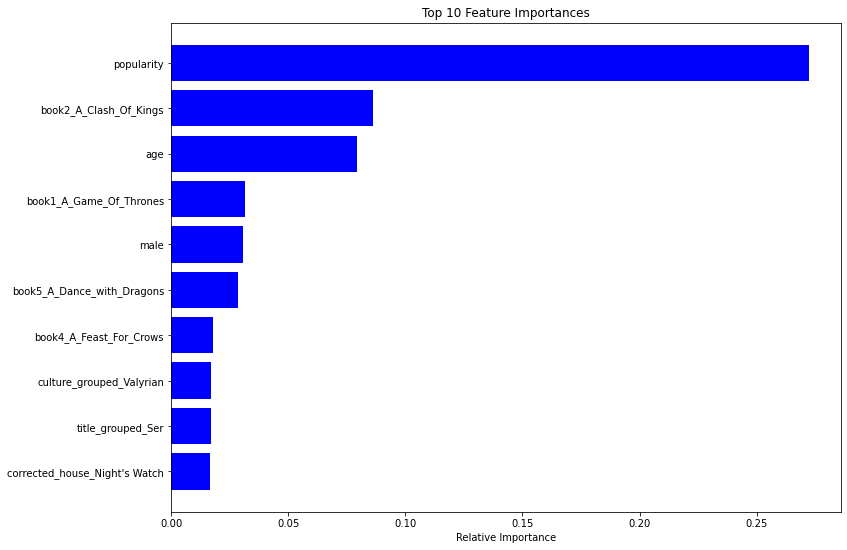

In [57]:
features = x_train.columns
importances = full_gbm_default.feature_importances_ # GBM is selected 
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(12,9))
plt.title('Top 10 Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()